# LIDAR / Landsat8 
## Daten besorgen
- https://libra.developmentseed.org/
- https://lv.eosda.com/
- https://remotepixel.ca/projects/satellitesearch.html

## Area of Interest (AOI) ausschneiden
Eingangsbild: LC81970232016259LGN00_B543.tif (Color Infrared Vegetation (5,4,3))
- QGIS -> Raster -> Extraction -> Clip by raster extent
- ```gdal_translate -of GTiff -ot UInt16 -a_nodata 0 -projwin 422255.9332178003 5799447.880139236 448802.24099753675 5785212.442474249 /tmp/LC81970232016259LGN00_B543.tif /tmp/osnabrueck.tif```


## Visualisierung des Landsat8 GeoTIFFs

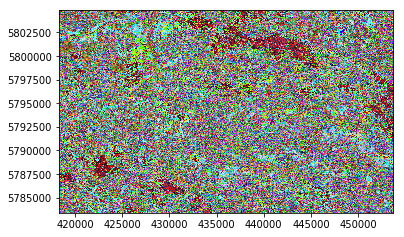

In [1]:
import rasterio
from rasterio.plot import show
src = rasterio.open( 'osnabrueck.tif')
show((src))


## Überlick über die Metadaten

In [3]:

#help(src)
src.meta

{'count': 3,
 'crs': CRS({'init': 'epsg:32632'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 716,
 'nodata': 0.0,
 'transform': Affine(30.0, 0.0, 418245.0,
       0.0, -30.0, 5804865.0),
 'width': 1183}

In [4]:
src.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 1183, 'height': 716, 'count': 3, 'crs': CRS({'init': 'epsg:32632'}), 'transform': Affine(30.0, 0.0, 418245.0,
       0.0, -30.0, 5804865.0), 'tiled': False, 'interleave': 'pixel'}

In [5]:
src.bounds

BoundingBox(left=418245.0, bottom=5783385.0, right=453735.0, top=5804865.0)

In [2]:
src.crs

CRS({'init': 'epsg:32632'})

In [3]:
# tags GeoTIFF format
src.tags()

{'AREA_OR_POINT': 'Area'}

In [4]:
src.width, src.height

(1183, 716)

In [5]:
src.res

(30.0, 30.0)

## Farbkanäle (Color Channels)

In [6]:
data=src.read()
len(data)

3

## Berechung des  [Normalized vegetation index](https://de.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index)

Als nächstes führen wir die NDVI-Berechnung durch Subtraktion und Aufteilung der Pixelwerte durch.

In [7]:
(nir, vis) = (data [0], data [1])

In [9]:
ndvi = (nir - vis) / (nir + vis)

In [10]:
ndvi

array([[ 0.64637375,  0.62896436,  0.58268934, ...,  0.43596515,
         0.29709521,  0.1501548 ],
       [ 0.62956762,  0.6345439 ,  0.60443306, ...,  0.34123924,
         0.29113203,  0.19013627],
       [ 0.63711452,  0.63447899,  0.57116055, ...,  0.25007597,
         0.27142859,  0.32083461],
       ..., 
       [ 0.74600226,  0.67086202,  0.72342193, ...,  0.29146141,
         0.31367078,  0.33974358],
       [ 0.76758409,  0.74847066,  0.75960839, ...,  0.53221291,
         0.61922139,  0.58099598],
       [ 0.72385544,  0.77241874,  0.74193549, ...,  0.41447607,
         0.51957071,  0.50226831]], dtype=float32)

## Visualisierung des Histogramms

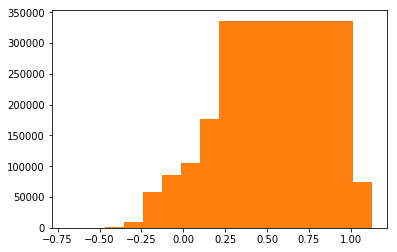

In [15]:
import numpy as np
import matplotlib.pyplot as plt
num, bins = np.histogram(ndvi)
plt.bar(bins[:-1], num)
plt.show()

In [11]:
ndvi.min()

-0.2932575

In [12]:
ndvi.max()

0.83719873

## Speicher des NDVI Ergebnisses als GeoTIFF

Schließlich werden die neuen Pixelwerte in eine neue Bilddatei geschrieben und übernehmen die GeoTIFF-Metadaten der Eingangsdatei:

In [14]:
profile=src.profile

In [15]:
profile.update(dtype=rasterio.float64, count=1, compress='lzw')

In [16]:
with rasterio.open('ndvi.tif', 'w', **profile) as dst:
    dst.write_band(1, ndvi.astype(rasterio.float64))

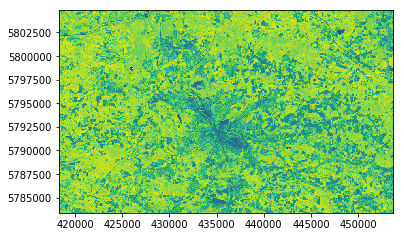

In [19]:
src_ndvi = rasterio.open( 'ndvi.tif')
show((src_ndvi))

## Anwenden einer color map

Die color map kann dabei helfen die Vegetation visuell zu unterscheiden. Weitere color map Optionen sind in der Dokumentation unter [matplotlib color example code: colormaps_reference.py](http://matplotlib.org/examples/color/colormaps_reference.html) zu finden.

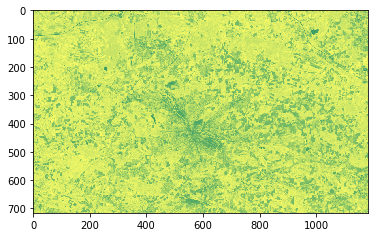

In [20]:
import matplotlib.pyplot as plt
plt.imshow(ndvi, cmap=plt.cm.summer)
plt.show()


In [21]:
plt.imsave("ndvi_cmap.png", ndvi, cmap=plt.cm.summer)